# Libraries imported<a href="#Libraries-imported" class="anchor-link">¶</a>

In \[1\]:

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.ticker as plticker

# Importing dataset<a href="#Importing-dataset" class="anchor-link">¶</a>

In \[2\]:

    path='./2021-01-20_Dataset_Births.csv'

In \[3\]:

    data=pd.read_csv(path)

# data snippet<a href="#data-snippet" class="anchor-link">¶</a>

In \[4\]:

    data.head()

Out\[4\]:

|     | year | month | day | gender | births |
|-----|------|-------|-----|--------|--------|
| 0   | 1969 | 1     | 1.0 | F      | 4046   |
| 1   | 1969 | 1     | 1.0 | M      | 4440   |
| 2   | 1969 | 1     | 2.0 | F      | 4454   |
| 3   | 1969 | 1     | 2.0 | M      | 4548   |
| 4   | 1969 | 1     | 3.0 | F      | 4548   |

# Figure_1 : What is the total number of births by year and gender?<a
href="#Figure_1-:-What-is-the-total-number-of-births-by-year-and-gender?"
class="anchor-link">¶</a>

In \[5\]:

    birth_count=data.groupby(['year','gender'])['births'].sum().unstack().plot(color=['blue','green'])
    plt.title('Gender-wise births')
    plt.xlabel('year')
    plt.ylabel('total births per year')
    plt.xticks(np.arange(1970,2010, step=5))
    plt.yticks(np.arange(1500000,2400000, step = 100000))
    plt.ticklabel_format(style="plain", axis = 'y')
    plt.margins(x=0)
    plt.grid(linestyle='-')
    plt.show()

![](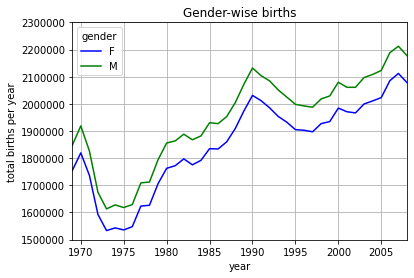%0A)

# Figure_2 : What are the average daily births by day of week and decade?<a
href="#Figure_2-:-What-are-the-average-daily-births-by-day-of-week-and-decade?"
class="anchor-link">¶</a>

In \[6\]:

    df=data.dropna() #removing rows with NULL value in day
    df=df[df.day!=99] #removing rows with 99 value in day
    #df['day'] = df['day'].astype(np.int64) 

    #removing feb 30 and feb 31 which is invalid
    df=df[(df['month']!=2) & (df['day']!=31)] 
    df=df[(df['month']!=2) & (df['day']!=30)] 

    df1=df #duplicate

    #adding Datetime column
    df['DateTime']=pd.to_datetime((df.year*10000+df.month*100+df.day).apply(str),
                                  format='%Y%m%d')

    #getting day name of week
    df['DayName']=df['DateTime'].dt.day_name()

    #grouping based on decade
    df=df.groupby([(df.year//10*10),"DayName"]).mean()

    #moving groupby index to columns
    df=df.rename(columns={'year':'OriginalYear'})
    df.reset_index(inplace=True)  

    #sorting DayName
    df['DayName']=pd.Categorical(df['DayName'], 
                                 categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
                                 ordered=True)

    df.groupby(['DayName','year'])['births'].mean().unstack().plot(color=['blue','green','red'],
                                                                   title='average daily births by day of week and decade')
    plt.legend(loc="upper right",  title = 'decade' )
    plt.margins(x=0)
    plt.grid(linestyle='-')
    plt.xlabel('dayofweek')
    plt.ylabel('mean births by day')
    plt.yticks(np.arange(3800,5800, step=200))
    plt.show()

![](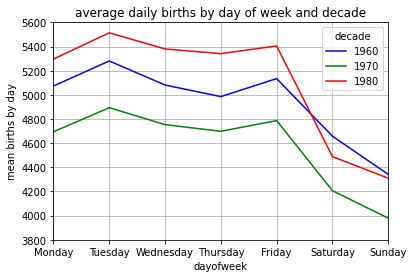%0A)

# Figure3 : Average Daily births by date<a href="#Figure3-:-Average-Daily-births-by-date"
class="anchor-link">¶</a>

In \[20\]:

    #adding Datetime column
    df1['DateTime']=pd.to_datetime((df1.year*10000+df1.month*100+df1.day).apply(str),
                                  format='%Y%m%d')

    df1.groupby(['month','day'])['births'].mean().plot(figsize=(20,5))
    plt.grid(linestyle='-')
    #to set ticks
    m=['','Jan','Feb','Mar','Apr','May','Jun',
                   'Jul','Aug','Sep','Oct','Nov','Dec','']
    plt.margins(x=0)
    plt.gca().xaxis.set_major_locator(plticker.MultipleLocator(30))
    plt.gca().set_xticklabels(m)
    plt.yticks(np.arange(3800,5600, step=200))
    plt.xlabel('Month')
    plt.ylabel('average births')
    plt.show()

    C:\Users\harsh\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
      if sys.path[0] == '':

![](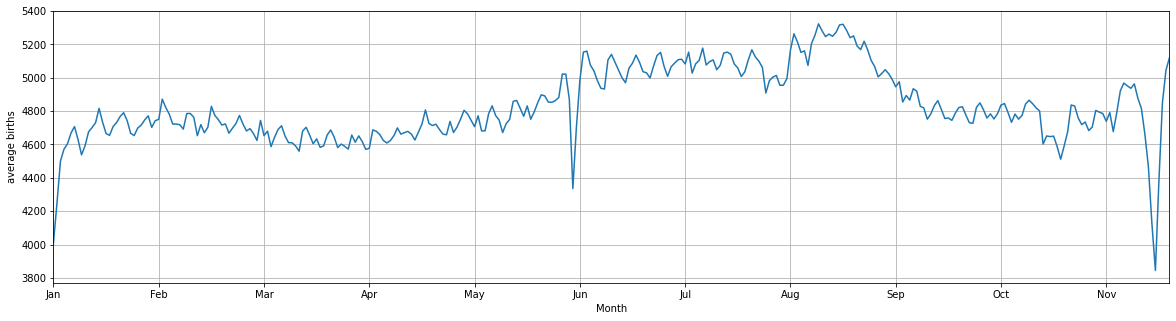%0A)

In \[22\]:

    !jupyter nbconvert --to html Project_1_Harshith_Srinivas.ipynb

    [NbConvertApp] Converting notebook Project_1_Harshith_Srinivas.ipynb to html
    [NbConvertApp] Writing 428308 bytes to Project_1_Harshith_Srinivas.html

In \[ \]:

     

In \[ \]: